In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt

## Import Mobility Data

In [2]:
# keep FIPS as string to preserve leading zeroes
# https://www.google.com/covid19/mobility/

In [3]:
mob = pd.read_csv(r"/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/hia_covid_inputs/2020_US_Region_Mobility_Report.csv", dtype={'census_fips_code': 'str'} )

In [4]:
mob.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

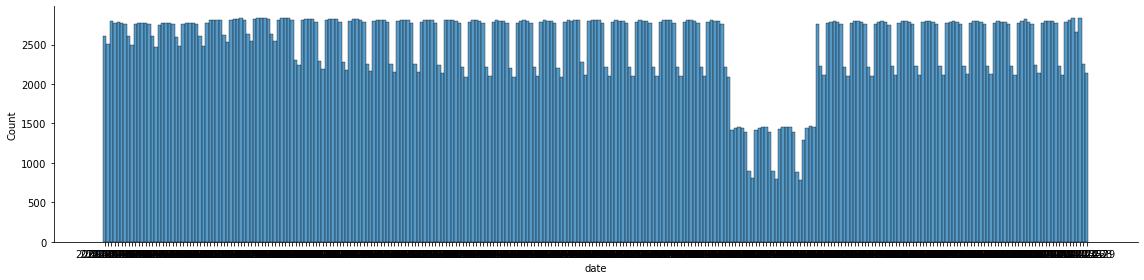

In [5]:
sns.displot(mob.date, height=4, aspect=4, )
#plt.xticks(ticks_locations, labels, rotation=90)

In [6]:
mob['date'] = mob['date'].astype('datetime64')

In [7]:
mob_renam_col = [i.replace('percent_change_from_baseline', 'PCT_CFB') for i in mob.columns]

In [8]:
mob.columns = mob_renam_col

In [9]:
mob_renam_col

['country_region_code',
 'country_region',
 'sub_region_1',
 'sub_region_2',
 'metro_area',
 'iso_3166_2_code',
 'census_fips_code',
 'date',
 'retail_and_recreation_PCT_CFB',
 'grocery_and_pharmacy_PCT_CFB',
 'parks_PCT_CFB',
 'transit_stations_PCT_CFB',
 'workplaces_PCT_CFB',
 'residential_PCT_CFB']

In [10]:
mob.dtypes

country_region_code                      object
country_region                           object
sub_region_1                             object
sub_region_2                             object
metro_area                              float64
iso_3166_2_code                          object
census_fips_code                         object
date                             datetime64[ns]
retail_and_recreation_PCT_CFB           float64
grocery_and_pharmacy_PCT_CFB            float64
parks_PCT_CFB                           float64
transit_stations_PCT_CFB                float64
workplaces_PCT_CFB                      float64
residential_PCT_CFB                     float64
dtype: object

In [11]:
mob.sort_values(by="date", inplace=True)

In [12]:
mob.head(5)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_PCT_CFB,grocery_and_pharmacy_PCT_CFB,parks_PCT_CFB,transit_stations_PCT_CFB,workplaces_PCT_CFB,residential_PCT_CFB
0,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
222414,US,United States,Kansas,Jackson County,NaN,NaN,20085,2020-02-15,2.0,-4.0,NaN,NaN,NaN,NaN
419645,US,United States,New York,Chemung County,NaN,NaN,36015,2020-02-15,11.0,-4.0,NaN,-9.0,3.0,1.0
222626,US,United States,Kansas,Jefferson County,NaN,NaN,20087,2020-02-15,NaN,5.0,NaN,NaN,7.0,NaN
27168,US,United States,Arkansas,Bradley County,NaN,NaN,05011,2020-02-15,-7.0,2.0,NaN,NaN,NaN,NaN


## Compute Rolling Average of Mobility Data

In [ ]:
list_all_locations = list(mob.census_fips_code.unique())
list_frames = []
for i in list_all_locations:
    frame = mob[mob.census_fips_code == i]
    frame['retail_and_recreation_PCT_CFB_RollingAvg'] = frame.rolling(7, min_periods=7, center=False, on="date")['retail_and_recreation_PCT_CFB'].mean()
    frame['grocery_and_pharmacy_PCT_CFB_RollingAvg'] = frame.rolling(7, min_periods=7, center=False, on="date")['grocery_and_pharmacy_PCT_CFB'].mean()
    frame['parks_PCT_CFB_RollingAvg'] = frame.rolling(7, min_periods=7, center=False, on="date")['parks_PCT_CFB'].mean()
    frame['transit_stations_PCT_CFB_RollingAvg'] = frame.rolling(7, min_periods=7, center=False, on="date")['transit_stations_PCT_CFB'].mean()
    frame['workplaces_PCT_CFB_RollingAvg'] = frame.rolling(7, min_periods=7, center=False, on="date")['workplaces_PCT_CFB'].mean()
    frame['residential_PCT_CFB_RollingAvg'] = frame.rolling(7, min_periods=7, center=False, on="date")['residential_PCT_CFB'].mean()
    list_frames.append(frame)

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [ ]:
recombine = pd.concat(list_frames)

In [ ]:
mobility_final = recombine

In [ ]:
mobility_final['Date'] = mobility_final['date']

mobility_final.drop(columns=['date'], inplace=True)

In [ ]:
mobility_final['County_FIPS'] = mobility_final['census_fips_code']
mobility_final.drop(columns=['census_fips_code'], inplace=True)

In [ ]:
mobility_final[(mobility_final.County_FIPS == "12009") & (mobility_final.Date > '2020-10-01')].head(-18)

## Import County-Level Dataset

In [ ]:
counties = pd.read_csv(r"/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/counties_dataset_full.csv",dtype={'County_FIPS':'str'})

In [ ]:
counties.dtypes

In [ ]:
#mobility_counties = mobility_final.merge(counties, on = "census_fips_code", how="left")

## Bring in the COVID Data to be Joined In 

In [ ]:
covid = pd.read_csv(r"/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/covid_dataset_full.csv",dtype={'County_FIPS':'str'})

In [ ]:
covid.Date = covid.Date.astype("datetime64")

In [ ]:
covid.shape[0]

In [ ]:
mobility_final.columns

In [ ]:
covid_mobility = covid.merge(mobility_final, on =['Date','County_FIPS'], how="left")

In [ ]:
# Join in the Urban Data

In [ ]:
mobility_covid_urban = covid_mobility.merge(counties, on=['County_FIPS'])

In [ ]:
# Can't deal with the + signs, so remove these 

large_columns = list(mobility_covid_urban.columns)
large_columns = [x.replace('+','') for x in large_columns]
mobility_covid_urban.columns = large_columns

In [ ]:
list(mobility_covid_urban.columns)

In [ ]:
columns = [ 'Date',
 'County_FIPS',
 'State Code',
 'Name',
 'retail_and_recreation_PCT_CFB',
 'grocery_and_pharmacy_PCT_CFB',
 'parks_PCT_CFB',
 'transit_stations_PCT_CFB',
 'workplaces_PCT_CFB',
 'residential_PCT_CFB',
 'retail_and_recreation_PCT_CFB_RollingAvg',
 'grocery_and_pharmacy_PCT_CFB_RollingAvg',
 'parks_PCT_CFB_RollingAvg',
 'transit_stations_PCT_CFB_RollingAvg',
 'workplaces_PCT_CFB_RollingAvg',
 'residential_PCT_CFB_RollingAvg',
 'HS_DIPLOMA_ONLY_2018',
 'SOME_COLLEGE_2018',
 'BACHELORS_PLUS_2018',
 'Poverty_PCT_2018',
 'UrbanCD',
 'Median_Income_2018',
 'Population_ACS',
 'Population_Black_ACS',
 'Population_Hisp_ACS',
 'Population_Native_ACS',
 'PCT_Black_ACS',
 'PCT_Hisp_ACS',
 'PCT_Native_ACS',
 'UrbanCD_Description',
 'Metro',
 'State',
 'Confirmed',
 'Deaths',
 'Country/Region',
 'Deaths_Previous',
 'Confirmed_Previous',
 'Deaths_New',
 'Deaths_New_7',
 'Deaths_New_14',
 'Deaths_New_21',
 'Deaths_New_28',
 'Confirmed_New',
 'locationcol',
 'Confirmed_New_RollingAvg',
 'Deaths_New_RollingAvg',
 'Deaths_New_7_RollingAvg',
 'Deaths_New_14_RollingAvg',
 'Deaths_New_21_RollingAvg',
 'Deaths_New_28_RollingAvg',
 ]

In [ ]:
combined_dataset_sub = mobility_covid_urban[columns]

In [ ]:
combined_dataset_sub

In [ ]:
#check to see matching
combined_dataset_sub[['State','State Code']].sample(frac=.00004)


In [ ]:
def create_percapita_measures(dataframe):
    list_col = list(dataframe.columns)
    for i in list(dataframe.columns):
        if "death" in i.lower() or "confirmed" in i.lower() and "previous" not in i.lower() :
            try:
                new_col_name = i+'_PER_100K'
                dataframe[new_col_name] = dataframe[i]/(dataframe['Population_ACS']/100000)
            except:
                print("error occurred for {i}".format(i=i)) 

In [ ]:
create_percapita_measures(combined_dataset_sub)

In [ ]:
list(combined_dataset_sub.columns)

In [ ]:
combined_dataset_sub.dtypes

In [ ]:
combined_dataset_sub.Deaths_New_7_RollingAvg_PER_100K.isna().value_counts()

In [ ]:
combined_dataset_sub.Population_ACS.isna().value_counts()

In [ ]:
combined_dataset_sub.Deaths_New_7_RollingAvg_PER_100K.isna().value_counts()

In [ ]:
combined_dataset_sub.Metro.isna().value_counts()

## Get Regions

In [ ]:
regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')

In [ ]:
regions= regions.drop(['State'], axis=1)

In [ ]:
regions

In [ ]:
nostate = combined_dataset_sub[combined_dataset_sub['State Code'].isna()==True]

In [ ]:
combined_dataset_sub_states = combined_dataset_sub[combined_dataset_sub['State Code'].isna()==False]

In [ ]:
combined_dataset_sub_regions = combined_dataset_sub_states.merge(regions, on="State Code", how="inner")

In [ ]:
combined_dataset_sub_regions.Division.isna().value_counts()

In [51]:
frame03_06 = combined_dataset_sub_regions[(combined_dataset_sub_regions['Date'] >= '2020-03-01') & (combined_dataset_sub_regions['Date'] <= '2020-06-01') ]
frame03_06.drop(columns=['State Code'], inplace=True)
frame03_06 = pd.DataFrame(frame03_06.groupby(["County_FIPS",'Metro','Name','Region','Division']).mean()).reset_index()

/Users/philip.ballentine/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
frame06_09 = combined_dataset_sub_regions[(combined_dataset_sub_regions['Date'] >= '2020-06-01') & (combined_dataset_sub_regions['Date'] <= '2020-09-01') ]
frame06_09.drop(columns=['State Code'], inplace=True)
frame06_09 = pd.DataFrame(frame06_09.groupby(["County_FIPS",'Metro','Name','Region','Division']).mean()).reset_index()

In [53]:
frame09_12 = combined_dataset_sub_regions[(combined_dataset_sub_regions['Date'] >= '2020-09-01') & (combined_dataset_sub_regions['Date'] <= '2020-12-01') ]
frame09_12.drop(columns=['State Code'], inplace=True)
frame09_12 = pd.DataFrame(frame09_12.groupby(["County_FIPS",'Metro','Name','Region','Division']).mean()).reset_index()

In [54]:
frame11_11 = combined_dataset_sub_regions[(combined_dataset_sub_regions['Date'] >= '2020-11-07') & (combined_dataset_sub_regions['Date'] <= '2020-11-21') ]
frame11_11.drop(columns=['State Code'], inplace=True)
frame11_11 = pd.DataFrame(frame11_11.groupby(["County_FIPS",'Metro','Name','Region','Division']).mean()).reset_index()

In [2]:
frame1124 = combined_dataset_sub_regions[combined_dataset_sub_regions['Date'] == '2020-11-24']
frame1124.drop(columns=['State Code'], inplace=True)
frame1124 = pd.DataFrame(frame1124.groupby(["County_FIPS",'Metro','Name','Region','Division']).mean()).reset_index()

NameError: name 'combined_dataset_sub_regions' is not defined

## Export to File

In [ ]:
path = str(os.getcwd())

In [55]:

os.chdir(r'/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/')
filename = "hia_covid_combined.csv"
combined_dataset_sub_regions.to_csv(filename)
print("{filename} has been created in {path}".format(filename=filename, path=path))

hia_covid_combined.csv has been created in /Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets


In [56]:

os.chdir(r'/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/')
filename = "hia_covid_combined_sample.csv"
combined_dataset_sub_regions.sample(frac=.10).to_csv(filename)
print("{filename} has been created in {path}".format(filename=filename, path=path))

hia_covid_combined_sample.csv has been created in /Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets


In [57]:
os.chdir(r'/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/')
filename = "hia_covid_0601_0901.csv"
frame06_09.to_csv(filename)
print("{filename} has been created in {path}".format(filename=filename, path=path))

hia_covid_0601_0901.csv has been created in /Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets


In [58]:
os.chdir(r'/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/')
filename = "hia_covid_0901_1201.csv"
frame09_12.to_csv(filename)
print("{filename} has been created in {path}".format(filename=filename, path=path))

hia_covid_0901_1201.csv has been created in /Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets


In [59]:
os.chdir(r'/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/')
path = str(os.getcwd())
filename = "hia_covid_0301_0601.csv"
frame03_06.to_csv(filename)
print("{filename} has been created in {path}".format(filename=filename, path=path))

hia_covid_0301_0601.csv has been created in /Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets


In [60]:
os.chdir(r'/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/')
filename = "hia_covid_0301_0601.csv"
frame03_06.to_csv(filename)
print("{filename} has been created in {path}".format(filename=filename, path=path))

hia_covid_0301_0601.csv has been created in /Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets


In [61]:
os.chdir(r'/Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets/')
filename = "hia_covid_1107_1121.csv"
frame11_11.to_csv(filename)
print("{filename} has been created in {path}".format(filename=filename, path=path))

hia_covid_1107_1121.csv has been created in /Users/philip.ballentine/Documents/hia_covid_repo/hia_covid_data_assets


In [62]:
combined_dataset_sub_regions[(combined_dataset_sub_regions.Name == "Foard County") & (combined_dataset_sub_regions.Date > '2020-11-01')]['Deaths']

819673    1
819674    1
819675    1
819676    1
819677    1
819678    1
819679    1
819680    1
819681    1
819682    1
819683    1
819684    1
819685    1
819686    1
819687    1
819688    1
819689    1
819690    1
819691    1
819692    1
819693    1
819694    1
819695    1
819696    1
819697    3
819698    3
819699    3
819700    3
819701    3
819702    3
819703    3
Name: Deaths, dtype: int64

In [63]:
frame11_11[frame11_11.Name == "Foard County"]['Deaths']

2593    1.0
Name: Deaths, dtype: float64

In [64]:
pharm = mob[['grocery_and_pharmacy_PCT_CFB','date']].dropna()
work = mob[['workplaces_PCT_CFB','date']].dropna()
tr = mob[['transit_stations_PCT_CFB','date']].dropna()
park = mob[['parks_PCT_CFB','date']].dropna()
res = mob[['residential_PCT_CFB','date']].dropna()
ret = mob[['retail_and_recreation_PCT_CFB','date']].dropna()

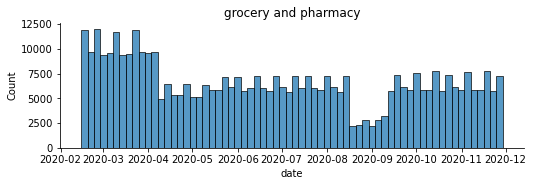

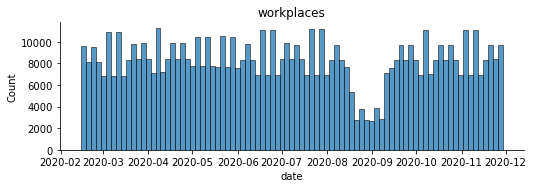

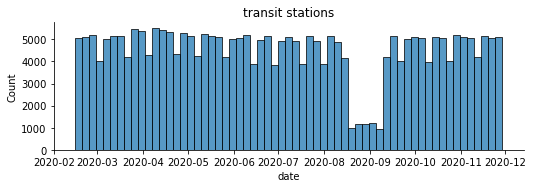

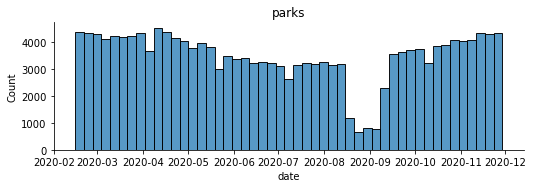

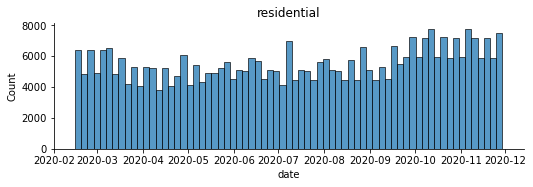

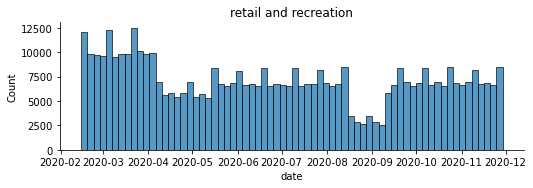

In [65]:
list_frames = [
(pharm, 'grocery and pharmacy'),
(work, 'workplaces'),
(tr, 'transit stations'),
(park, 'parks'),
(res, 'residential'),
(ret, 'retail and recreation')
]

for i in list_frames:
    sns.displot(i[0].date, height=2.5, aspect=3, )
    plt.title("{x}".format(x=i[1]))